<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-05 13:06:20.744067


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

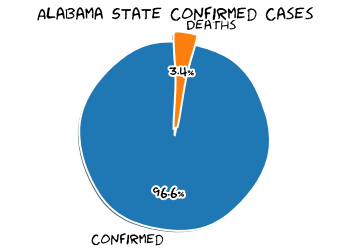

Alabama State Total Population
4887871
Alabama State Confirmed
19072 (0.3901903303094537% of population)
Alabama State Deaths
653 (3.4238674496644292% of confirmed)



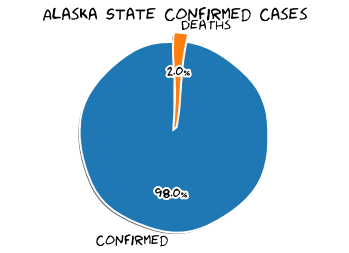

Alaska State Total Population
737438
Alaska State Confirmed
512 (0.06942956560415926% of population)
Alaska State Deaths
10 (1.953125% of confirmed)



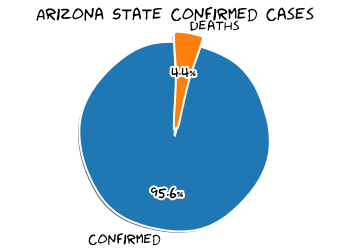

Arizona State Total Population
7171646
Arizona State Confirmed
22886 (0.3191178147945395% of population)
Arizona State Deaths
996 (4.352005592938914% of confirmed)



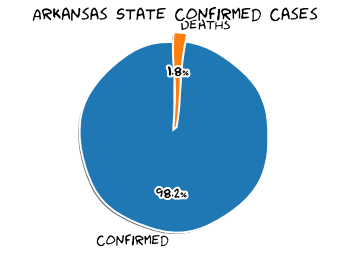

Arkansas State Total Population
3013825
Arkansas State Confirmed
8425 (0.2795450963476645% of population)
Arkansas State Deaths
151 (1.7922848664688427% of confirmed)



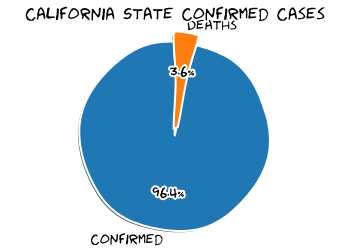

California State Total Population
39557045
California State Confirmed
122168 (0.30884005617709814% of population)
California State Deaths
4444 (3.637613777748674% of confirmed)



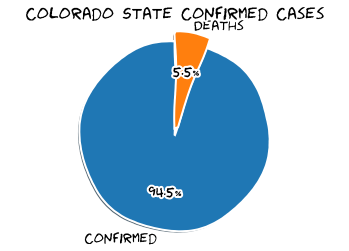

Colorado State Total Population
5695564
Colorado State Confirmed
27346 (0.48012804350894833% of population)
Colorado State Deaths
1512 (5.529145030351788% of confirmed)



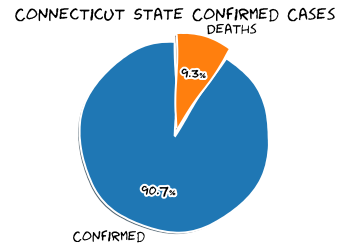

Connecticut State Total Population
3572665
Connecticut State Confirmed
43239 (1.210273003486193% of population)
Connecticut State Deaths
4007 (9.267096833876824% of confirmed)



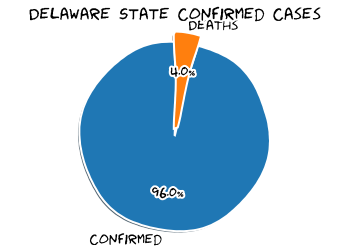

Delaware State Total Population
967171
Delaware State Confirmed
9746 (1.0076811649646236% of population)
Delaware State Deaths
386 (3.9605992201928992% of confirmed)



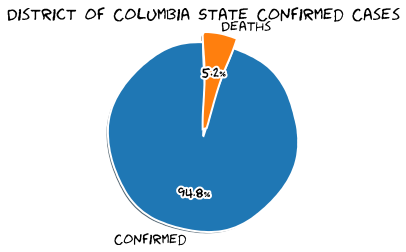

District of Columbia State Total Population
702455
District of Columbia State Confirmed
9120 (1.298303805937747% of population)
District of Columbia State Deaths
475 (5.208333333333334% of confirmed)



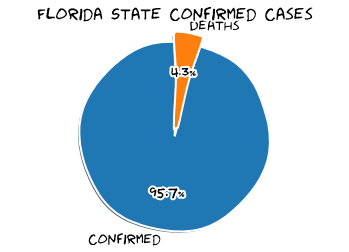

Florida State Total Population
21299325
Florida State Confirmed
60183 (0.28255825008539004% of population)
Florida State Deaths
2607 (4.3317880464583025% of confirmed)



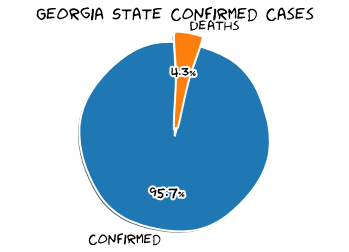

Georgia State Total Population
10519475
Georgia State Confirmed
49859 (0.4739685202921249% of population)
Georgia State Deaths
2149 (4.310154636073728% of confirmed)



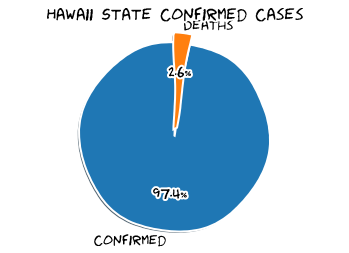

Hawaii State Total Population
1420491
Hawaii State Confirmed
655 (0.04611081661200247% of population)
Hawaii State Deaths
17 (2.595419847328244% of confirmed)



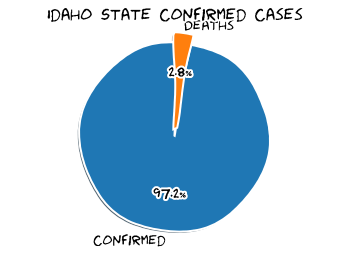

Idaho State Total Population
1754208
Idaho State Confirmed
2990 (0.17044729017311516% of population)
Idaho State Deaths
83 (2.7759197324414715% of confirmed)



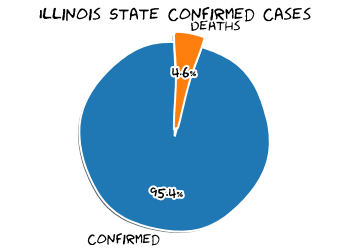

Illinois State Total Population
12741080
Illinois State Confirmed
124759 (0.979187007694795% of population)
Illinois State Deaths
5736 (4.597664296764161% of confirmed)



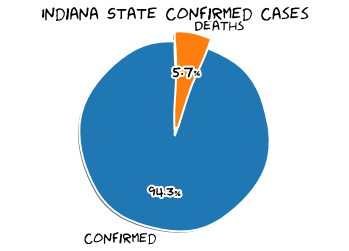

Indiana State Total Population
6691878
Indiana State Confirmed
36096 (0.5394001504510393% of population)
Indiana State Deaths
2052 (5.684840425531915% of confirmed)



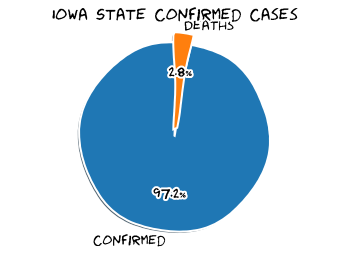

Iowa State Total Population
3156145
Iowa State Confirmed
20806 (0.659221930551353% of population)
Iowa State Deaths
583 (2.802076324137268% of confirmed)



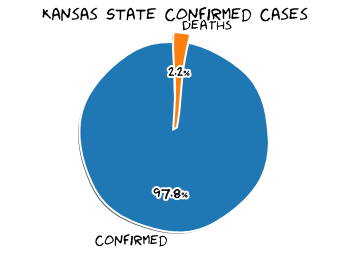

Kansas State Total Population
2911510
Kansas State Confirmed
10167 (0.34920024317278664% of population)
Kansas State Deaths
227 (2.232713681518639% of confirmed)



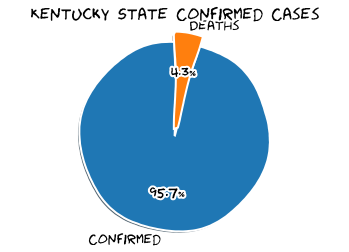

Kentucky State Total Population
4468402
Kentucky State Confirmed
10705 (0.2395711039427518% of population)
Kentucky State Deaths
458 (4.27837459131247% of confirmed)



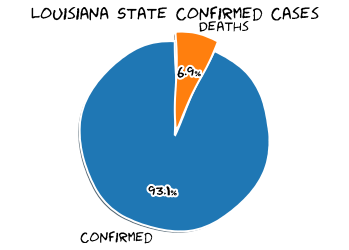

Louisiana State Total Population
4659978
Louisiana State Confirmed
41562 (0.891892622669034% of population)
Louisiana State Deaths
2883 (6.936624801501372% of confirmed)



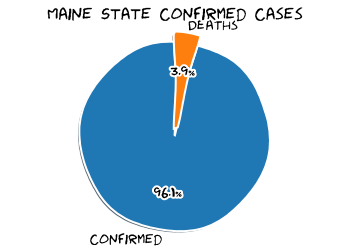

Maine State Total Population
1338404
Maine State Confirmed
2446 (0.18275498280041003% of population)
Maine State Deaths
95 (3.883892068683565% of confirmed)



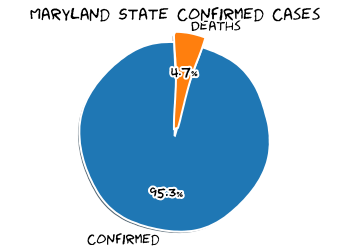

Maryland State Total Population
6042718
Maryland State Confirmed
55858 (0.9243853510953184% of population)
Maryland State Deaths
2628 (4.704787138816284% of confirmed)



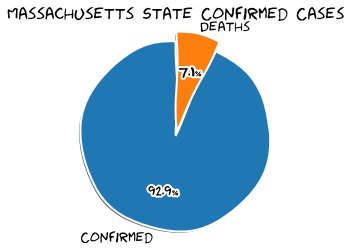

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
102063 (1.4787133688362855% of population)
Massachusetts State Deaths
7201 (7.055446146007858% of confirmed)



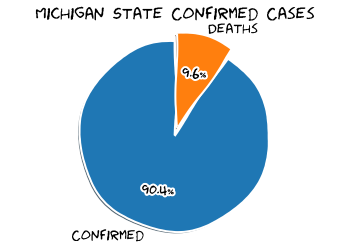

Michigan State Total Population
9995915
Michigan State Confirmed
58241 (0.5826480117127847% of population)
Michigan State Deaths
5595 (9.606634501468038% of confirmed)



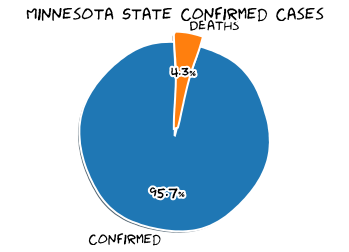

Minnesota State Total Population
5611179
Minnesota State Confirmed
26273 (0.46822601809708797% of population)
Minnesota State Deaths
1126 (4.285768659840902% of confirmed)



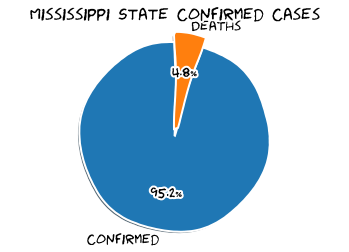

Mississippi State Total Population
2986530
Mississippi State Confirmed
16560 (0.5544896585669656% of population)
Mississippi State Deaths
794 (4.794685990338164% of confirmed)



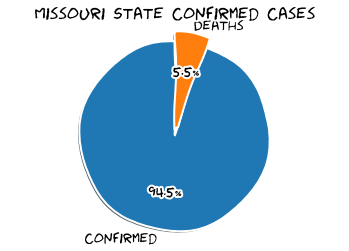

Missouri State Total Population
6126452
Missouri State Confirmed
14438 (0.23566658157119325% of population)
Missouri State Deaths
795 (5.506302812023826% of confirmed)



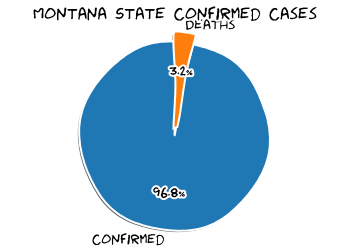

Montana State Total Population
1062305
Montana State Confirmed
539 (0.05073872381284095% of population)
Montana State Deaths
17 (3.153988868274583% of confirmed)



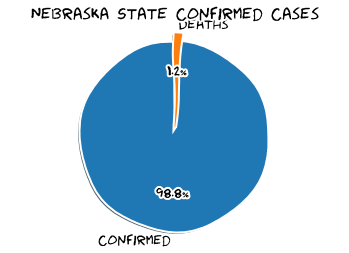

Nebraska State Total Population
1929268
Nebraska State Confirmed
15139 (0.7847017625337692% of population)
Nebraska State Deaths
187 (1.23522029196116% of confirmed)



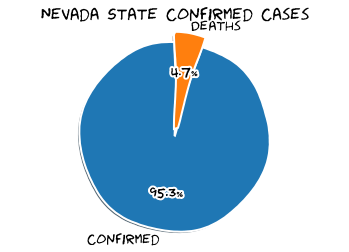

Nevada State Total Population
3034392
Nevada State Confirmed
9129 (0.30085104363575965% of population)
Nevada State Deaths
430 (4.710263993865703% of confirmed)



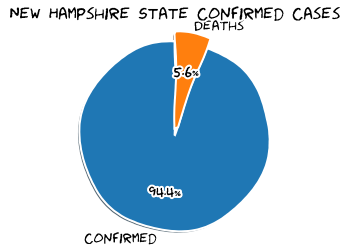

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
4876 (0.35946560822377105% of population)
New Hampshire State Deaths
273 (5.598851517637407% of confirmed)



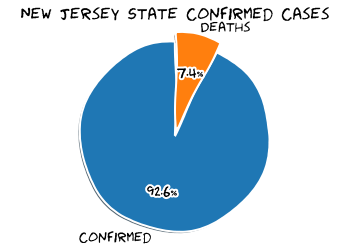

New Jersey State Total Population
8908520
New Jersey State Confirmed
162530 (1.8244332391912463% of population)
New Jersey State Deaths
11970 (7.364794191841506% of confirmed)



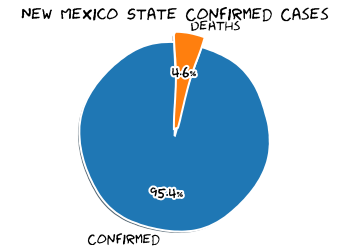

New Mexico State Total Population
2095428
New Mexico State Confirmed
8353 (0.39862977873732713% of population)
New Mexico State Deaths
383 (4.585178977612834% of confirmed)



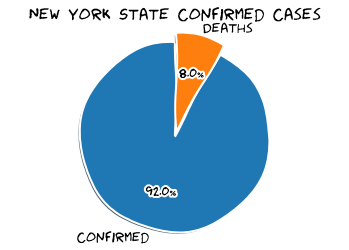

New York State Total Population
19542209
New York State Confirmed
375133 (1.9196038687335704% of population)
New York State Deaths
30174 (8.043547221918626% of confirmed)



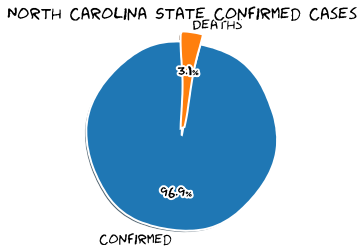

North Carolina State Total Population
10383620
North Carolina State Confirmed
32075 (0.30889997900539506% of population)
North Carolina State Deaths
1006 (3.1363990646921276% of confirmed)



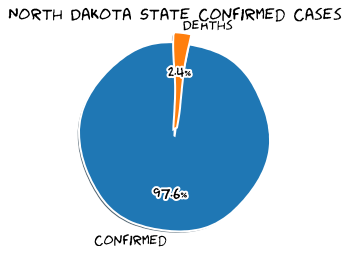

North Dakota State Total Population
760077
North Dakota State Confirmed
2706 (0.35601656147995536% of population)
North Dakota State Deaths
66 (2.4390243902439024% of confirmed)



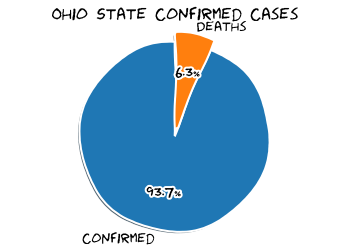

Ohio State Total Population
11689442
Ohio State Confirmed
37282 (0.3189373795601193% of population)
Ohio State Deaths
2340 (6.276487312912398% of confirmed)



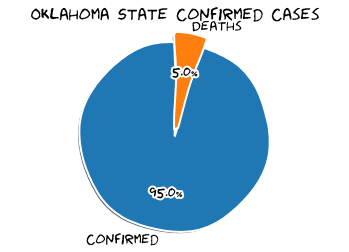

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
6907 (0.17516767987656348% of population)
Oklahoma State Deaths
344 (4.980454611263935% of confirmed)



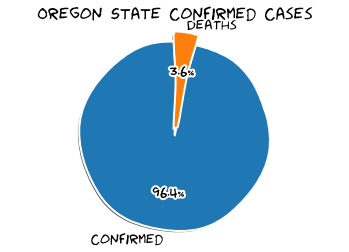

Oregon State Total Population
4190713
Oregon State Confirmed
4474 (0.10675987594473782% of population)
Oregon State Deaths
159 (3.553866785873938% of confirmed)



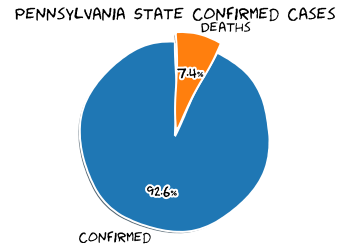

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
78335 (0.6116548216374406% of population)
Pennsylvania State Deaths
5832 (7.444947979830216% of confirmed)



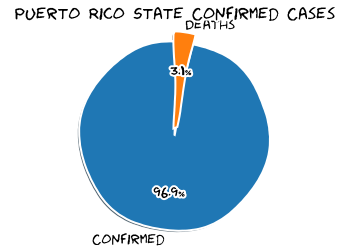

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
4508 (0.14108870529830653% of population)
Puerto Rico State Deaths
140 (3.1055900621118013% of confirmed)



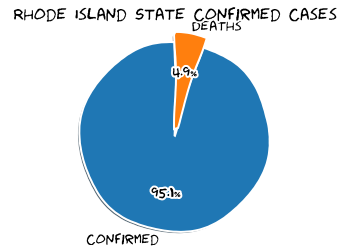

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
15325 (1.449426140743298% of population)
Rhode Island State Deaths
756 (4.933115823817292% of confirmed)



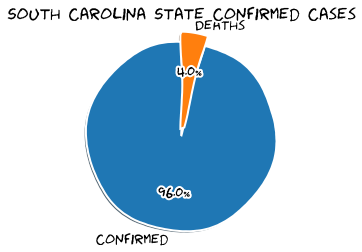

South Carolina State Total Population
5084127
South Carolina State Confirmed
12415 (0.24419138231598067% of population)
South Carolina State Deaths
501 (4.035440998791784% of confirmed)



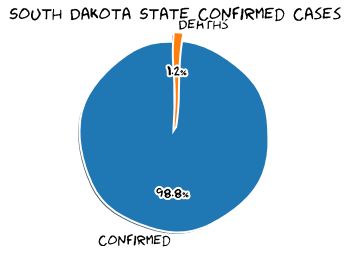

South Dakota State Total Population
882235
South Dakota State Confirmed
5247 (0.5947394968460784% of population)
South Dakota State Deaths
64 (1.219744615971031% of confirmed)



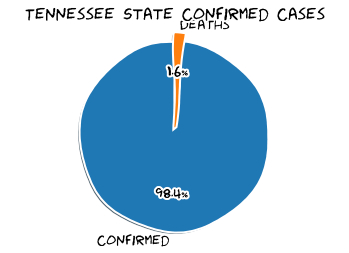

Tennessee State Total Population
6770010
Tennessee State Confirmed
25190 (0.37208216826858453% of population)
Tennessee State Deaths
401 (1.591901548233426% of confirmed)



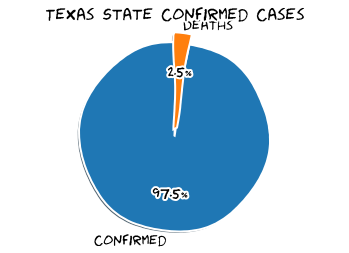

Texas State Total Population
28701845
Texas State Confirmed
70555 (0.24582043419159988% of population)
Texas State Deaths
1776 (2.517185174686415% of confirmed)



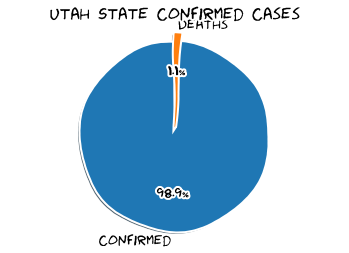

Utah State Total Population
3161105
Utah State Confirmed
10813 (0.3420639301763149% of population)
Utah State Deaths
117 (1.0820308887450292% of confirmed)



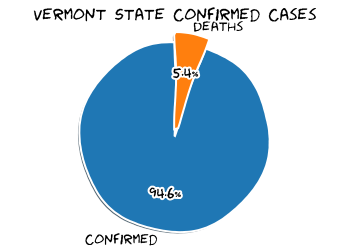

Vermont State Total Population
626299
Vermont State Confirmed
1026 (0.16381951751479723% of population)
Vermont State Deaths
55 (5.360623781676413% of confirmed)



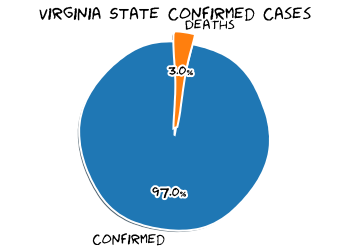

Virginia State Total Population
8517685
Virginia State Confirmed
47856 (0.5618428011836549% of population)
Virginia State Deaths
1445 (3.019475091942494% of confirmed)



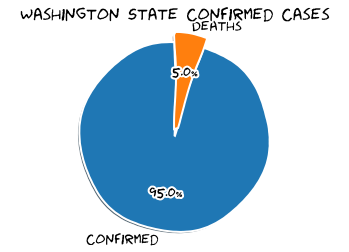

Washington State Total Population
7535591
Washington State Confirmed
22729 (0.3016219962044119% of population)
Washington State Deaths
1138 (5.006819481719389% of confirmed)



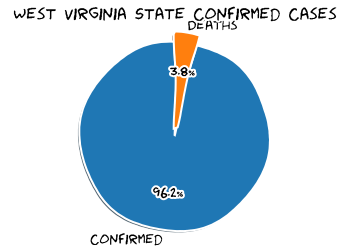

West Virginia State Total Population
1805832
West Virginia State Confirmed
2102 (0.11640063970513315% of population)
West Virginia State Deaths
79 (3.758325404376784% of confirmed)



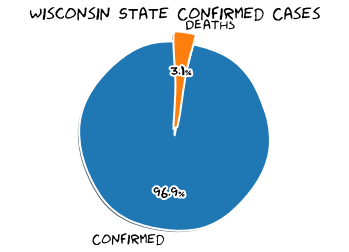

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
19892 (0.3421650869139227% of population)
Wisconsin State Deaths
626 (3.1469937663382264% of confirmed)



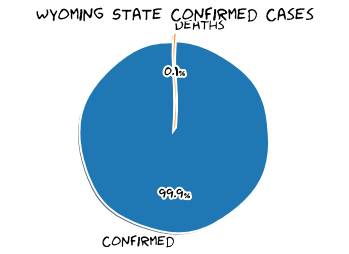

Wyoming State Total Population
577737
Wyoming State Confirmed
921 (0.1594150971808972% of population)
Wyoming State Deaths
1 (0.10857763300760044% of confirmed)



In [10]:
for i in states:
    state_details(i)

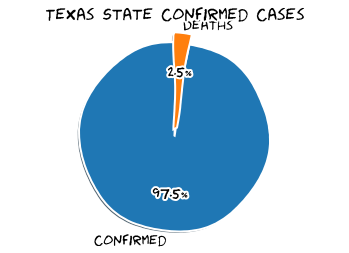

Texas State Total Population
28701845
Texas State Confirmed
70555 (0.24582043419159988% of population)
Texas State Deaths
1776 (2.517185174686415% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1872660
US Deaths
107973

New York City Confirmed
205406
New York City Deaths
21752

Philippines Confirmed
20626
Philippines Deaths
987



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 6664908},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 391656},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-05T11:33:13.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 2892047},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-05 02:33:06,34.22333378,-82.46170658,46,0,0,46,"Abbeville, South Carolina, US",187.54841603131243,0.0
1,22001,Acadia,Louisiana,US,2020-06-05 02:33:06,30.2950649,-92.41419698,462,26,0,436,"Acadia, Louisiana, US",744.6208397131114,5.627705627705628
2,51001,Accomack,Virginia,US,2020-06-05 02:33:06,37.76707161,-75.63234615,966,12,0,954,"Accomack, Virginia, US",2989.2313405124396,1.2422360248447204
3,16001,Ada,Idaho,US,2020-06-05 02:33:06,43.4526575,-116.24155159999998,823,22,0,801,"Ada, Idaho, US",170.8933173030003,2.67314702308627
4,19001,Adair,Iowa,US,2020-06-05 02:33:06,41.33075609,-94.47105874,9,0,0,9,"Adair, Iowa, US",125.83892617449665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3640,,,,West Bank and Gaza,2020-06-05 02:33:06,31.9522,35.2332,464,3,377,84,West Bank and Gaza,9.095513873010944,0.646551724137931
3641,,,,Western Sahara,2020-06-05 02:33:06,24.2155,-12.8858,9,1,6,2,Western Sahara,1.5067048365225253,11.11111111111111
3642,,,,Yemen,2020-06-05 02:33:06,15.552726999999999,48.516388,453,103,17,333,Yemen,1.5188107222538427,22.73730684326711
3643,,,,Zambia,2020-06-05 02:33:06,-13.133897,27.849332,1089,7,912,170,Zambia,5.923643420382425,0.642791551882461


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591360384000,40.767273,-73.971526,205406,0,21752,183654,New York City,36061,"New York City, New York, US",2463.842015,None,None,84036061,USA
1,Illinois,US,1591360384000,41.841448,-87.816588,80713,0,3846,76867,Cook,17031,"Cook, Illinois, US",1567.171815,None,None,84017031,USA
2,California,US,1591360384000,34.308284,-118.228241,59692,0,2532,57160,Los Angeles,06037,"Los Angeles, California, US",594.594718,None,None,84006037,USA
3,New York,US,1591360384000,40.740665,-73.589419,40713,0,2132,38581,Nassau,36059,"Nassau, New York, US",3000.389115,None,None,84036059,USA
4,New York,US,1591360384000,40.883201,-72.801217,40153,0,1916,38237,Suffolk,36103,"Suffolk, New York, US",2719.285711,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Montana,US,1591360384000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA
2983,Kansas,US,1591360384000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
2984,Kentucky,US,1591360384000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2985,Arkansas,US,1591360384000,35.189025,-91.243949,1,0,0,1,Woodruff,05147,"Woodruff, Arkansas, US",15.822785,None,None,84005147,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591360384000,40.767273,-73.971526,205406,0,21752,183654,New York City,36061,"New York City, New York, US",2463.842015,None,None,84036061,USA
3,New York,US,1591360384000,40.740665,-73.589419,40713,0,2132,38581,Nassau,36059,"Nassau, New York, US",3000.389115,None,None,84036059,USA
4,New York,US,1591360384000,40.883201,-72.801217,40153,0,1916,38237,Suffolk,36103,"Suffolk, New York, US",2719.285711,None,None,84036103,USA
5,New York,US,1591360384000,41.162784,-73.757417,33767,0,1385,32382,Westchester,36119,"Westchester, New York, US",3490.107555,None,None,84036119,USA
21,New York,US,1591360384000,41.150279,-74.025605,13280,0,655,12625,Rockland,36087,"Rockland, New York, US",4076.257946,None,None,84036087,USA
30,New York,US,1591360384000,41.403375,-74.302408,10471,0,444,10027,Orange,36071,"Orange, New York, US",2720.164181,None,None,84036071,USA
60,New York,US,1591360384000,42.762490,-78.730637,6308,0,549,5759,Erie,36029,"Erie, New York, US",686.620906,None,None,84036029,USA
89,New York,US,1591360384000,41.764861,-73.743567,3962,0,142,3820,Dutchess,36027,"Dutchess, New York, US",1346.620533,None,None,84036027,USA
104,New York,US,1591360384000,43.146389,-77.693229,3081,0,230,2851,Monroe,36055,"Monroe, New York, US",415.357860,None,None,84036055,USA
134,New York,US,1591360384000,43.004919,-76.199712,2295,0,149,2146,Onondaga,36067,"Onondaga, New York, US",498.341035,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

375133

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591360384000,40.767273,-73.971526,205406,0,21752,183654,New York City,36061,"New York City, New York, US",2463.842015,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
56,None,Philippines,1591360384000,12.879721,121.774017,20626,4330,987,15309,None,None,Philippines,18.822592,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
